### EDA for Political Email Database

In [1]:
#Read in the data
import pandas as pd

df1=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails1_df.csv")
df2=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails2_df.csv")
df3=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails3_df.csv")
df4=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails4_df.csv")

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(20000, 9)
(20000, 9)
(20000, 9)
(23316, 9)


In [7]:
#Stack 4 dataframes together
df = pd.concat([df1, df2, df3, df4], ignore_index=True, axis=0)
#Delete first row and column
df = df[1:]
df = df.iloc[: , 1:]
#Preview dataframe
df.head(2)

,sender,subject,date,body,party,country,locality,office
1,JusticeDemocrats.com <[email protected]>,Critical preparations,"July 3, 2019 11:28 PM",[1]Justice Democrats\n\r\n John -- \n\r\n ...,Political Party:\nDemocratic,Country:\n\nUnited States,State/Locality:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Office:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a
2,Ana Maria Archila <[email protected]>,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019 11:31 PM","Dear friend,\n\r\n \n\r\nWe have all seen the ...",Political Party:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Country:\n\nUnited States,State/Locality:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Office:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a


### Clean up various columns

In [8]:
#Clean up columns - change data type
df['sender'] = df['sender'].astype('string')
df['subject'] = df['subject'].astype('string')
df['date'] = df['date'].astype('string')
df['body'] = df['body'].astype('string')
df['party'] = df['party'].astype('string')
df['country'] = df['country'].astype('string')
df['locality'] = df['locality'].astype('string')
df.dtypes

sender      string
subject     string
date        string
body        string
party       string
country     string
locality    string
office      object
dtype: object

In [9]:
#Clean up text columns

import re 

df['party'] = df['party'].replace('Political Party:','',regex=True)
df['country'] = df['country'].replace('Country:','',regex=True)
df['locality'] = df['locality'].replace('State/Locality:','',regex=True)
df['office'] = df['office'].replace('Office:','',regex=True)
df = df.replace('\n','',regex=True)
df = df.replace('\t','',regex=True)
df['sender'] = df['sender'].replace('<','',regex=True)
df['sender'] = df['sender'].replace('>','',regex=True)

def remove_brackets_contents(text):
    pattern = r"\[.*?\]"
    return re.sub(pattern, " ", text)


def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, ' ', text)

df.loc[:,'sender'] = df['sender'].apply(func = remove_brackets_contents)


df.head(2)

,sender,subject,date,body,party,country,locality,office
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019 11:28 PM",[1]Justice Democrats John -- Last month...,Democratic,United States,n/a,n/a
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019 11:31 PM","Dear friend, We have all seen the images and...",n/a,United States,n/a,n/a


In [10]:
#Cleaning up the email body column
import warnings
warnings.filterwarnings('ignore')

df['body'] = df['body'].replace('\n','',regex=True)
df['body'] = df['body'].replace('\r','',regex=True)
df.loc[:,'body'] = df['body'].apply(func = remove_brackets_contents)
df.loc[:,'body'] = df['body'].apply(func = remove_special_characters)


df['body'] = df['body'].replace('   ',' ',regex=True)
df['body'] = df['body'].replace('    ',' ',regex=True)
df['body'] = df['body'].replace('     ',' ',regex=True)

df['body'] = df['body'].replace(']',' ',regex=True)
df['body'] = df['body'].replace('\xa0',' ',regex=True)
df['body'] = df['body'].replace('almostdaily','almost daily',regex=True)


#Remove all the text that follows these sentences
df['body'] = df['body'].str.replace("(If you need to remove yourself from our email).*","")
df['body'] = df['body'].str.replace("(Email is the most important way).*","")
df['body'] = df['body'].str.replace("(This email was sent to).*","")
df['body'] = df['body'].str.replace("(Thank you for speaking).*","")
df['body'] = df['body'].str.replace("(All Rights Reserved).*","")
df['body'] = df['body'].str.replace("(mailto:).*","")
df['body'] = df['body'].str.replace("(Thank you for choosing to fight).*","")
df['body'] = df['body'].str.replace("(Paid for by).*","")
df['body'] = df['body'].str.replace("(We look forward to hearing from you).*","")
df['body'] = df['body'].str.replace("(PAID FOR BY).*","")
df['body'] = df['body'].str.replace("(Thanks for your).*","")
df['body'] = df['body'].str.replace("(All rights reserved).*","")
df['body'] = df['body'].str.replace("(unsubscribe).*","")
df['body'] = df['body'].str.replace("(Sincerely).*","")
df['body'] = df['body'].str.replace("(Facebook).*","")
df['body'] = df['body'].str.replace("(Twitter).*","")
df['body'] = df['body'].str.replace("(Please, sign your name).*","")
df['body'] = df['body'].str.replace("(CONTRIBUTE).*","")
df['body'] = df['body'].str.replace("(Contribute).*","")

### Create features

In [11]:
df[['split1','split2','split3','split4','split5']] = df['date'].str.split(' ',expand=True)
df['date'] = df['split1'] + ' ' + df['split2'] + ' ' + df['split3']
df['time'] = df['split4'] + ' ' + df['split5']

del df['split1'], df['split2'], df['split3'], df['split4'], df['split5']
print(df['date'][1])
print(df['time'][1])

July 3, 2019
11:28 PM


In [12]:
df.head(2)

,sender,subject,date,body,party,country,locality,office,time
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM


In [13]:
import numpy as np

df['AM_PM'] = df['time'].str[-2:]
df['Hour'] = df['time'].str[:2]
df['Hour'] = np.where(df['Hour'].str[1:]==":",df['Hour'].str[:1],df['Hour'])
df['Hour'] = df['Hour'].astype(int)

df['Hour_Mil'] = np.where(
    df['AM_PM'] == 'PM', df['Hour'] + 12, np.where(
    (df['AM_PM'] == 'AM') & (df['Hour'] == 12), df['Hour'] - 12, df['Hour'])) 


df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23


In [14]:
#Grab the day, month, year
df[['month','day','year']] = df['date'].str.split(' ',expand=True)
df['day'] = df['day'].str[:1]


df['month_num'] = np.where(
    df['month'] == 'January', 1, np.where(
    df['month'] == 'February', 2, np.where(
    df['month'] == 'March', 3, np.where(
    df['month'] == 'April', 4, np.where(
    df['month'] == 'May', 5, np.where(
    df['month'] == 'June', 6, np.where(
    df['month'] == 'July', 7, np.where(
    df['month'] == 'August', 8, np.where(
    df['month'] == 'September', 9, np.where(
    df['month'] == 'October', 10, np.where(
    df['month'] == 'November', 11, 12
)))))))))))



df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23,July,3,2019,7


In [15]:
df_dom = df[df['country']=="United States"]
df_for = df[df['country']!="United States"]

print(df_dom.shape)
print(df_for.shape)

(74148, 16)
(9167, 16)


### Exploratory Data Analysis

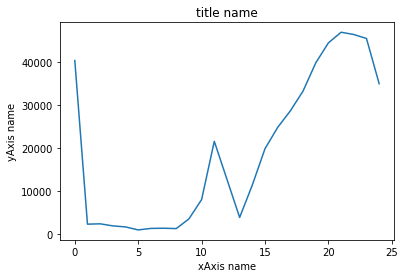

In [16]:
#When are emails sent?
# import plotly.express as px
new_df = df_dom.groupby(['Hour_Mil']).sum().reset_index()
new_df.rename(columns={ new_df.columns[1]: "Count" }, inplace = True)

# fig = px.line(new_df, x="Hour_Mil", y="Count", title='US Emails Sent by Hour')
# fig.show()

import matplotlib.pyplot as plt

plt.plot(new_df['Hour_Mil'],new_df['Count'])
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [17]:
month1_emails = df_dom[df_dom['month_num']==1]
month2_emails = df_dom[df_dom['month_num']==2]
month3_emails = df_dom[df_dom['month_num']==3]
month4_emails = df_dom[df_dom['month_num']==4]
month5_emails = df_dom[df_dom['month_num']==5]
month6_emails = df_dom[df_dom['month_num']==6]
month7_emails = df_dom[df_dom['month_num']==7]
month8_emails = df_dom[df_dom['month_num']==8]
month9_emails = df_dom[df_dom['month_num']==9]
month10_emails = df_dom[df_dom['month_num']==10]
month11_emails = df_dom[df_dom['month_num']==11]
month12_emails = df_dom[df_dom['month_num']==12]

m1 = month1_emails.groupby(['Hour_Mil']).sum().reset_index()
m2 = month2_emails.groupby(['Hour_Mil']).sum().reset_index()
m3 = month3_emails.groupby(['Hour_Mil']).sum().reset_index()
m4 = month4_emails.groupby(['Hour_Mil']).sum().reset_index()
m5 = month5_emails.groupby(['Hour_Mil']).sum().reset_index()
m6 = month6_emails.groupby(['Hour_Mil']).sum().reset_index()
m7 = month7_emails.groupby(['Hour_Mil']).sum().reset_index()
m8 = month8_emails.groupby(['Hour_Mil']).sum().reset_index()
m9 = month9_emails.groupby(['Hour_Mil']).sum().reset_index()
m10 = month10_emails.groupby(['Hour_Mil']).sum().reset_index()
m11 = month11_emails.groupby(['Hour_Mil']).sum().reset_index()
m12 = month12_emails.groupby(['Hour_Mil']).sum().reset_index()

m1.rename(columns={ m1.columns[1]: "Count" }, inplace = True)
m2.rename(columns={ m2.columns[1]: "Count" }, inplace = True)
m3.rename(columns={ m3.columns[1]: "Count" }, inplace = True)
m4.rename(columns={ m4.columns[1]: "Count" }, inplace = True)
m5.rename(columns={ m5.columns[1]: "Count" }, inplace = True)
m6.rename(columns={ m6.columns[1]: "Count" }, inplace = True)
m7.rename(columns={ m7.columns[1]: "Count" }, inplace = True)
m8.rename(columns={ m8.columns[1]: "Count" }, inplace = True)
m9.rename(columns={ m9.columns[1]: "Count" }, inplace = True)
m10.rename(columns={ m10.columns[1]: "Count" }, inplace = True)
m11.rename(columns={ m11.columns[1]: "Count" }, inplace = True)
m12.rename(columns={ m12.columns[1]: "Count" }, inplace = True)


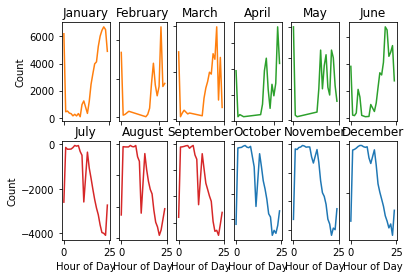

In [18]:
fig, axs = plt.subplots(2, 6)

axs[0, 0].plot(m1['Hour_Mil'], m1['Count'], 'tab:orange')
axs[0, 0].set_title('January')

axs[0, 1].plot(m2['Hour_Mil'], m2['Count'], 'tab:orange')
axs[0, 1].set_title('February')

axs[0, 2].plot(m3['Hour_Mil'], m3['Count'], 'tab:orange')
axs[0, 2].set_title('March')

axs[0, 3].plot(m4['Hour_Mil'], m4['Count'], 'tab:green')
axs[0, 3].set_title('April')

axs[0, 4].plot(m5['Hour_Mil'], m5['Count'], 'tab:green')
axs[0, 4].set_title('May')

axs[0, 5].plot(m6['Hour_Mil'], m6['Count'], 'tab:green')
axs[0, 5].set_title('June')


axs[1, 0].plot(m7['Hour_Mil'], -m7['Count'], 'tab:red')
axs[1, 0].set_title('July')

axs[1, 1].plot(m8['Hour_Mil'], -m8['Count'], 'tab:red')
axs[1, 1].set_title('August')

axs[1, 2].plot(m9['Hour_Mil'], -m9['Count'], 'tab:red')
axs[1, 2].set_title('September')

axs[1, 3].plot(m10['Hour_Mil'], -m10['Count'], 'tab:blue')
axs[1, 3].set_title('October')

axs[1, 4].plot(m11['Hour_Mil'], -m11['Count'], 'tab:blue')
axs[1, 4].set_title('November')

axs[1, 5].plot(m12['Hour_Mil'], -m12['Count'], 'tab:blue')
axs[1, 5].set_title('December')

for ax in axs.flat:
    ax.set(xlabel='Hour of Day', ylabel='Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



In [19]:
df_dom['State'] = np.where(df_dom['locality'].isin([
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 
    'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
    'Wisconsin', 'Wyoming'
]),1,0)
df_dom['State'].value_counts()

0    46324
1    27824
Name: State, dtype: int64

In [20]:
import pandas as pd
test = df_dom[df_dom['State']==1]
test = test[['locality']]

# Get State Crosswalk From Generic Website
crosswalk = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/state_codes.html'
states = pd.read_html(crosswalk)[0]

# Demo Crosswalking State Name to State Abbreviation
test['ST'] = test['locality'].map(dict(zip(states['Description'], 
                                         states['Code'])))

test.head()

,locality,ST
3,Ohio,OH
4,Texas,TX
5,Kentucky,KY
8,Washington,WA
9,California,CA


### Prepare data for sentiment classification

In [21]:
from nltk.tokenize import RegexpTokenizer
import contractions

def punct(text):
    token=RegexpTokenizer(r'\w+')#regex
    text = token.tokenize(text)
    text= " ".join(text)
    return text 

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

def lemmatize(text):
    lemmed = contractions.fix(str(text))
    return lemmed

In [22]:
#Apply standardizing functions to body of email column

#0.) Convert everything to string
df['cleaned_body'] = df['body'].astype(str)
#1.) Lowercase
df.loc[:,'cleaned_body'] = df['cleaned_body'].str.lower()
#2.) Remove punctuation
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = punct)
#3.) Remove non alpha-numeric characters
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_special_characters)
#4.) Remove digits
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_digits)
#5.) Lemmatize words
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = lemmatize)

#Present results
df['cleaned_body'].head(5)

1    justice democrats john last month we needed to...
2    dear friend we have all seen the images and re...
3    team access to education is fundamental to a c...
4    beto for america john the trump administration...
5    john tomorrow is the fourth of july a day for ...
Name: cleaned_body, dtype: object

In [23]:
#Set up VADER score to get labels for doing classification later
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_body'].map(lambda x: sia.polarity_scores(x))
df['sentiment'].head(4)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jonzimmerman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1    {'neg': 0.033, 'neu': 0.705, 'pos': 0.262, 'co...
2    {'neg': 0.122, 'neu': 0.798, 'pos': 0.08, 'com...
3    {'neg': 0.108, 'neu': 0.758, 'pos': 0.134, 'co...
4    {'neg': 0.026, 'neu': 0.824, 'pos': 0.151, 'co...
Name: sentiment, dtype: object

In [24]:
df['compound']  = df['sentiment'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda x: 1 if x >=0 else 0)
df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num,cleaned_body,sentiment,compound,comp_score
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7,justice democrats john last month we needed to...,"{'neg': 0.033, 'neu': 0.705, 'pos': 0.262, 'co...",0.9876,1
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23,July,3,2019,7,dear friend we have all seen the images and re...,"{'neg': 0.122, 'neu': 0.798, 'pos': 0.08, 'com...",-0.9814,0


In [25]:
# df.to_csv('/Users/jonzimmerman/Desktop/Data Projects/Political Emails/main/data/emails_df_full.csv', index=False, header=False)


In [26]:
df.shape

(83315, 20)

In [27]:
df.columns

Index(['sender', 'subject', 'date', 'body', 'party', 'country', 'locality',
       'office', 'time', 'AM_PM', 'Hour', 'Hour_Mil', 'month', 'day', 'year',
       'month_num', 'cleaned_body', 'sentiment', 'compound', 'comp_score'],
      dtype='object')

## Let's try out some models

#### Model #1: Logistic Regression

In [28]:
df['comp_score'].value_counts()

1    68986
0    14329
Name: comp_score, dtype: int64

In [36]:
model_df = df[df['country']=='United States']
model_df.shape

(74148, 20)

In [42]:
model_df.head(1)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num,cleaned_body,sentiment,compound,comp_score
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7,justice democrats john last month we needed to...,"{'neg': 0.033, 'neu': 0.705, 'pos': 0.262, 'co...",0.9876,1


In [49]:
from sklearn.model_selection import train_test_split

y = model_df['comp_score']
X = model_df['cleaned_body']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51903,)
(51903,)
(22245,)
(22245,)


In [96]:
from sklearn.feature_extraction.text import CountVectorizer

#Count vectorizer for bag of words
cv=CountVectorizer(
    min_df=0,
    max_df=1,
    binary=False,
    ngram_range=(1,3)
)

#transformed train reviews
cv_train_text=cv.fit_transform(X_train)
#transformed test reviews
cv_test_text=cv.transform(X_test)

print('BOW_cv_train:',cv_train_text.shape)
print('BOW_cv_test:',cv_test_text.shape)

BOW_cv_train: (51903, 7537147)
BOW_cv_test: (22245, 7537147)


In [97]:
#training the model
weights = {0:5.0, 1:1.0}

lr=LogisticRegression(
    #penalty='l2',
    #max_iter=500,
    #C=1,
    random_state=42,
    class_weight=weights
)

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_text,y_train)
print(lr_bow)

LogisticRegression(class_weight={0: 5.0, 1: 1.0}, random_state=42)


In [98]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_text)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_text)

print('BOW Negative Predictions: ', lr_bow_predict.tolist().count(0))
print('BOW Positive Predictions: ', lr_bow_predict.tolist().count(1))

BOW Negative Predictions:  921
BOW Positive Predictions:  21324


In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8581703753652506


In [100]:
#Classification report for bag of words 
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.82      0.20      0.32      3752
    Negative       0.86      0.99      0.92     18493

    accuracy                           0.86     22245
   macro avg       0.84      0.60      0.62     22245
weighted avg       0.85      0.86      0.82     22245



In [101]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,lr_bow_predict,labels=[1,0])
print(cm_bow)

[[18331   162]
 [ 2993   759]]
